Porcentaje Verde: 35.44%
Porcentaje Amarillo: 12.87%
Porcentaje Rojo: 25.26%
Estado de la pieza: NO ACEPTABLE (demasiada deformación)


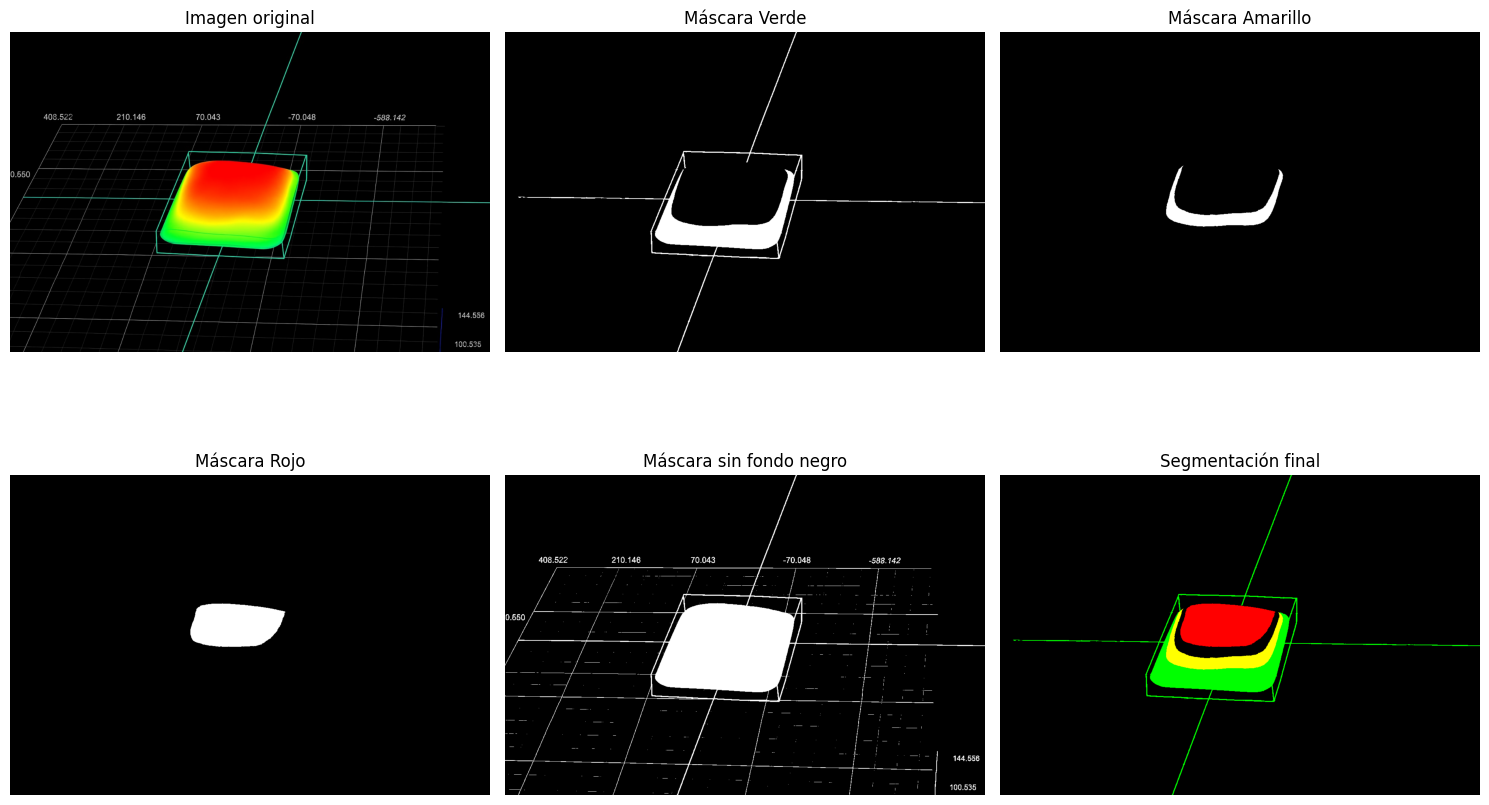

In [ ]:
import cv2                       #Librería para el procesamiento de imagenes
import numpy as np               #Libería para trabajar con arreglos y martrices
                                 #Ayuda a definir los rangos de colores como arreglos con pixeles
import matplotlib.pyplot as plt  #Libería gráfica para mostrar imágenes en formato de gráficos

# Comenzamos por leer la imagen, con cv2.imread() leemos laimagen en formato
# BGR, con cv2.cvtColor() la convertimos en RGB para poder procesar
# bien los colores con la librería Matplot
img_path = "placa4.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Para mostrar en matplotlib

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #HSV es un formato que ayuda a facilitart el procesameinto de colores

#=============DEFINIMOS RANGOS DE COLORES==============
# Verde
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Amarillo
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([35, 255, 255])

# Rojo (dos rangos)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

#=============CREACIÓN DE MÁSCARA POR COLOR=======================
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Excluir fondo negro
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])
mask_black = cv2.inRange(hsv, lower_black, upper_black)
mask_not_black = cv2.bitwise_not(mask_black)

# Aplicar exclusión
mask_green = cv2.bitwise_and(mask_green, mask_not_black)
mask_yellow = cv2.bitwise_and(mask_yellow, mask_not_black)
mask_red = cv2.bitwise_and(mask_red, mask_not_black)

# Contar píxeles válidos
valid_pixels = cv2.countNonZero(mask_not_black)
green_pixels = cv2.countNonZero(mask_green)
yellow_pixels = cv2.countNonZero(mask_yellow)
red_pixels = cv2.countNonZero(mask_red)

# Evitar división por cero
if valid_pixels == 0:
    print("No hay píxeles válidos distintos de negro")
    exit()

# Calcular porcentajes
p_green = (green_pixels / valid_pixels) * 100
p_yellow = (yellow_pixels / valid_pixels) * 100
p_red = (red_pixels / valid_pixels) * 100

print(f"Porcentaje Verde: {p_green:.2f}%")
print(f"Porcentaje Amarillo: {p_yellow:.2f}%")
print(f"Porcentaje Rojo: {p_red:.2f}%")

# Tomar decisión
if p_red > 10:
    estado = "NO ACEPTABLE (demasiada deformación)"
elif p_green > p_yellow and p_red < 5:
    estado = "PIEZA EN BUEN ESTADO"
elif p_yellow >= p_green and p_red < 50:
    estado = "ACEPTABLE"
else:
    estado = "CONDICIÓN INTERMEDIA"

print("Estado de la pieza:", estado)

# Crear imagen segmentada con colores visibles
output = np.zeros_like(img_rgb)
output[mask_green > 0] = [0, 255, 0]    # Verde
output[mask_yellow > 0] = [255, 255, 0] # Amarillo
output[mask_red > 0] = [255, 0, 0]      # Rojo

# Mostrar resultados
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(mask_green, cmap="gray")
plt.title("Máscara Verde")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(mask_yellow, cmap="gray")
plt.title("Máscara Amarillo")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(mask_red, cmap="gray")
plt.title("Máscara Rojo")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(mask_not_black, cmap="gray")
plt.title("Máscara sin fondo negro")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(output)
plt.title("Segmentación final")
plt.axis("off")

plt.tight_layout()
plt.show()


Resultados Placa 1: {'verde': 86.42263221559888, 'amarillo': 0.0, 'rojo': 0.0, 'estado': 'BUEN ESTADO'}
Resultados Placa 2: {'verde': 35.43982753519043, 'amarillo': 12.867227459103015, 'rojo': 25.26313564695439, 'estado': 'NO ACEPTABLE'}

Conclusión: Solo la Placa 1 está en buen estado


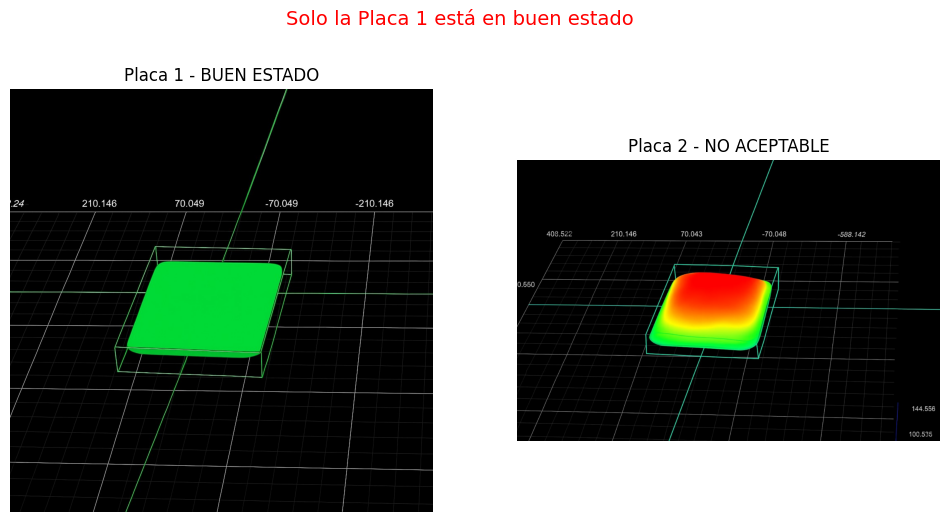

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analizar_pieza(img_path):
    # 1. Leer imagen
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 2. Definir rangos HSV
    lower_green = np.array([35, 50, 50]);  upper_green = np.array([85, 255, 255])
    lower_yellow = np.array([20, 100, 100]); upper_yellow = np.array([35, 255, 255])
    lower_red1 = np.array([0, 100, 100]);   upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100]); upper_red2 = np.array([179, 255, 255])

    # 3. Crear máscaras
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    # 4. Excluir fondo negro
    lower_black = np.array([0, 0, 0]); upper_black = np.array([180, 255, 50])
    mask_black = cv2.inRange(hsv, lower_black, upper_black)
    mask_not_black = cv2.bitwise_not(mask_black)

    mask_green = cv2.bitwise_and(mask_green, mask_not_black)
    mask_yellow = cv2.bitwise_and(mask_yellow, mask_not_black)
    mask_red = cv2.bitwise_and(mask_red, mask_not_black)

    # 5. Contar píxeles
    valid_pixels = cv2.countNonZero(mask_not_black)
    if valid_pixels == 0:
        return img_rgb, {"verde":0, "amarillo":0, "rojo":0, "estado":"Sin datos"}

    green_pixels = cv2.countNonZero(mask_green)
    yellow_pixels = cv2.countNonZero(mask_yellow)
    red_pixels = cv2.countNonZero(mask_red)

    p_green = (green_pixels / valid_pixels) * 100
    p_yellow = (yellow_pixels / valid_pixels) * 100
    p_red = (red_pixels / valid_pixels) * 100

    # 6. Clasificación
    if p_red > 10:
        estado = "NO ACEPTABLE"
    elif p_green > p_yellow and p_red < 5:
        estado = "BUEN ESTADO"
    elif p_yellow >= p_green and p_red < 50:
        estado = "ACEPTABLE"
    else:
        estado = "CONDICIÓN INTERMEDIA"

    return img_rgb, {"verde":p_green, "amarillo":p_yellow, "rojo":p_red, "estado":estado}


# --- COMPARACIÓN DE DOS PIEZAS ---
placa1_path = "placa1.jpg"
placa2_path = img_path

img1, datos1 = analizar_pieza(placa1_path)
img2, datos2 = analizar_pieza(placa2_path)

# Mostrar resultados
print("Resultados Placa 1:", datos1)
print("Resultados Placa 2:", datos2)

# Comparar estados
if datos1["estado"] == "BUEN ESTADO" and datos2["estado"] == "BUEN ESTADO":
    conclusion = "AMBAS piezas están en buen estado"
elif datos1["estado"] == "BUEN ESTADO" and datos2["estado"] != "BUEN ESTADO":
    conclusion = "Solo la Placa 1 está en buen estado"
elif datos1["estado"] != "BUEN ESTADO" and datos2["estado"] == "BUEN ESTADO":
    conclusion = "Solo la Placa 2 está en buen estado"
else:
    conclusion = "NINGUNA pieza está en buen estado"

print("\nConclusión:", conclusion)

# --- Mostrar gráficamente ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Placa 1 - " + datos1["estado"])
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Placa 2 - " + datos2["estado"])
plt.axis("off")

plt.suptitle(conclusion, fontsize=14, color="red")
plt.show()


Porcentaje Verde: 35.79% (82816 px)
Porcentaje Amarillo: 13.60% (31465 px)
Porcentaje Rojo: 23.39% (54128 px)
Estado de la pieza: NO ACEPTABLE (demasiada deformación)


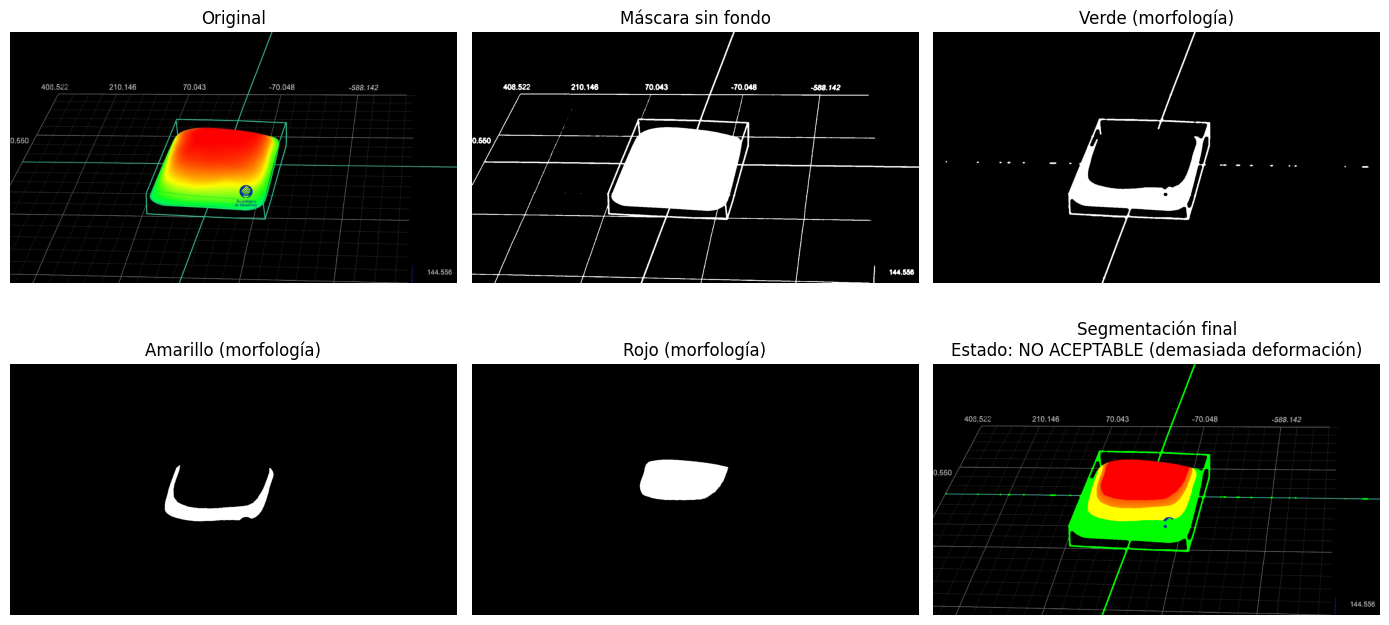

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# CONFIG
img_path = "placaConLogo.png"   # <-- ajusta nombre/ubicación
# ----------------------------

# 1) Leer imagen
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"No se pudo leer '{img_path}'")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2) Suavizado
img_blur = cv2.GaussianBlur(img, (7,7), 0)

# 3) Convertir a HSV
hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)

# 4) Rango de colores
lower_green = np.array([35, 40, 40]); upper_green = np.array([85, 255, 255])
lower_yellow = np.array([18, 80, 80]); upper_yellow = np.array([35, 255, 255])
lower_red1 = np.array([0, 100, 100]); upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100]); upper_red2 = np.array([179, 255, 255])

# 5) Máscaras
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))

# Fondo negro
mask_not_black = cv2.bitwise_not(cv2.inRange(hsv, (0,0,0), (180,255,40)))
mask_green = cv2.bitwise_and(mask_green, mask_not_black)
mask_yellow = cv2.bitwise_and(mask_yellow, mask_not_black)
mask_red = cv2.bitwise_and(mask_red, mask_not_black)

# 6) Morfología
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel_open, iterations=1)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel_close, iterations=1)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_OPEN, kernel_open, iterations=1)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_CLOSE, kernel_close, iterations=1)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel_open, iterations=1)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel_close, iterations=1)

# 7) Porcentajes
valid_pixels = cv2.countNonZero(mask_not_black)
green_pixels = cv2.countNonZero(mask_green)
yellow_pixels = cv2.countNonZero(mask_yellow)
red_pixels = cv2.countNonZero(mask_red)

p_green = (green_pixels / valid_pixels) * 100
p_yellow = (yellow_pixels / valid_pixels) * 100
p_red = (red_pixels / valid_pixels) * 100

print(f"Porcentaje Verde: {p_green:.2f}% ({green_pixels} px)")
print(f"Porcentaje Amarillo: {p_yellow:.2f}% ({yellow_pixels} px)")
print(f"Porcentaje Rojo: {p_red:.2f}% ({red_pixels} px)")

if p_red > 10:
    estado = "NO ACEPTABLE (demasiada deformación)"
elif p_green > p_yellow and p_red < 5:
    estado = "PIEZA EN BUEN ESTADO"
elif p_yellow >= p_green and p_red < 50:
    estado = "ACEPTABLE"
else:
    estado = "CONDICIÓN INTERMEDIA"

print("Estado de la pieza:", estado)

# 8) Visualización
output = img_rgb.copy()
output[mask_green > 0] = [0,255,0]
output[mask_yellow > 0] = [255,255,0]
output[mask_red > 0] = [255,0,0]

plt.figure(figsize=(14,7))
plt.subplot(2,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(mask_not_black, cmap='gray'); plt.title("Máscara sin fondo"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(mask_green, cmap='gray'); plt.title("Verde (morfología)"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(mask_yellow, cmap='gray'); plt.title("Amarillo (morfología)"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(mask_red, cmap='gray'); plt.title("Rojo (morfología)"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(output); plt.title(f"Segmentación final\nEstado: {estado}"); plt.axis("off")
plt.tight_layout()
plt.show()
